# Hasil Eksperimen

## hasil iterasi 1

In [11]:
import json
with open('./analysis/gt_boxes.json') as infile:
    gt_boxes_dict = json.load(infile)

with open('./analysis/pred_boxes_v1.json') as infile:
    pred_boxes_dict = json.load(infile)

In [1]:
def plot_curve(
    precisions, recalls, category='Person', label=None, color=None, ax=None):
    """Simple plotting helper function"""

    if ax is None:
        plt.figure(figsize=(10,8))
        ax = plt.gca()

    if color is None:
        color = COLORS[0]
    ax.scatter(recalls, precisions, label=label, s=50, color=color)
    ax.set_xlabel('recall')
    ax.set_ylabel('precision')
    ax.set_title('Precision-Recall curve for {}'.format(category))
    ax.set_xlim([0.0,1.])
    ax.set_ylim([0.0,1.1])
    return ax

map for bicycle: 32.64
avg precs:  [0.6677, 0.5957, 0.5848, 0.495, 0.3826, 0.2644, 0.2019, 0.0568, 0.0152, 0.0]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.5641 secs


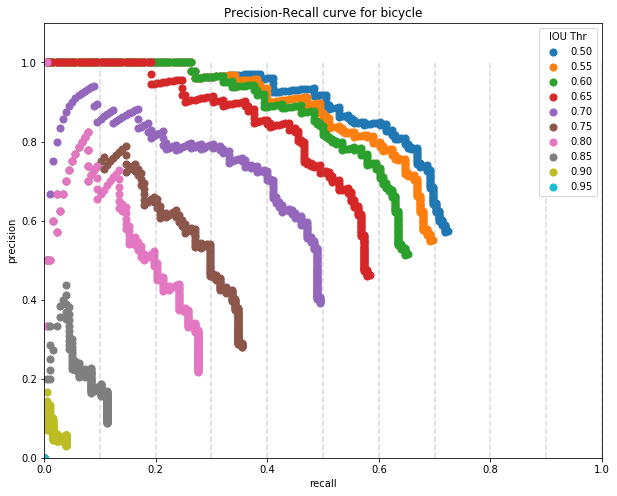

map for bus: 49.31
avg precs:  [0.7716, 0.7111, 0.7079, 0.7032, 0.684, 0.5628, 0.4574, 0.2611, 0.0692, 0.0032]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.4810 secs


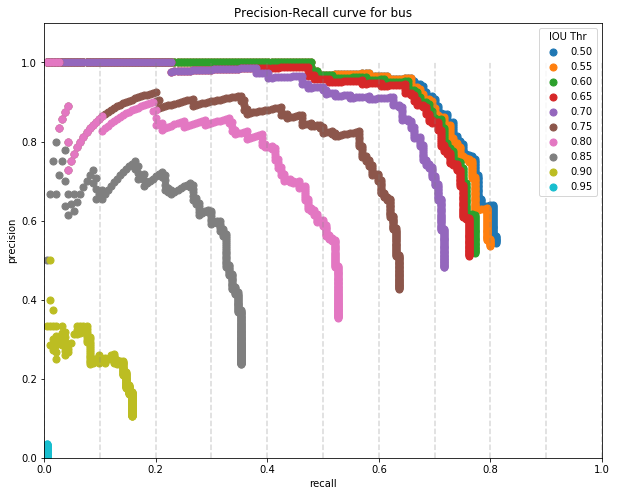

map for car: 29.58
avg precs:  [0.584, 0.5558, 0.5073, 0.4383, 0.3671, 0.2653, 0.165, 0.0611, 0.0112, 0.0025]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 4.2557 secs


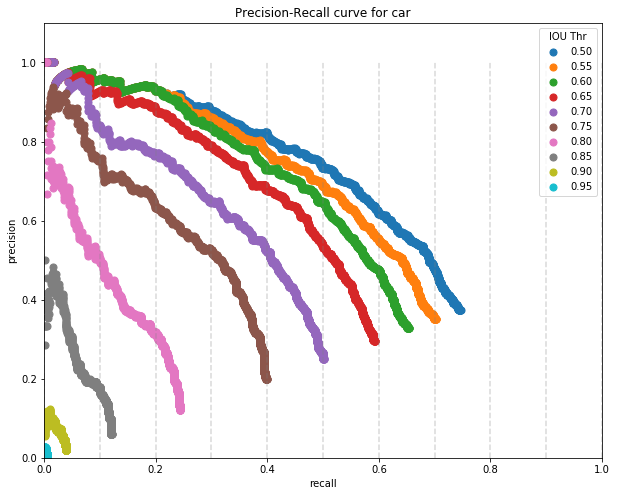

map for motorbike: 38.74
avg precs:  [0.6996, 0.6912, 0.6732, 0.5802, 0.4841, 0.3581, 0.2538, 0.1226, 0.0114, 0.0]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.3811 secs


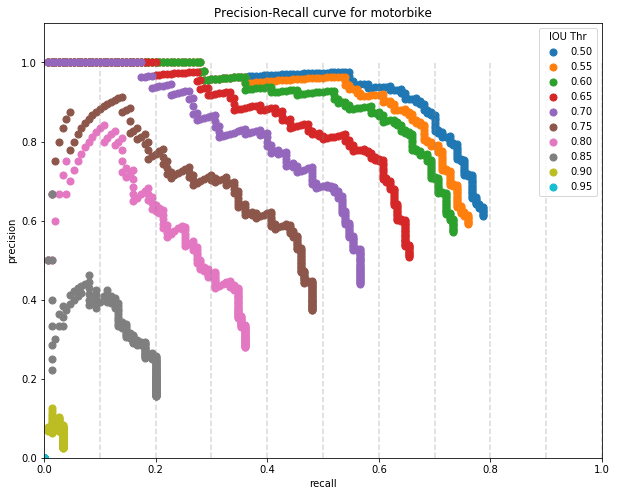

In [14]:
import time
from lib.metrics import *
ap = {key:[] for key in pred_boxes_dict}
for key in pred_boxes_dict:
    gt_boxes = gt_boxes_dict[key]
    pred_boxes = pred_boxes_dict[key]
    start_time = time.time()
    ax = None
    avg_precs = []
    iou_thrs = []
    for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
        data = get_avg_precision_at_iou(gt_boxes, pred_boxes, iou_thr=iou_thr)
        avg_precs.append(data['avg_prec'])
        iou_thrs.append(iou_thr)

        precisions = data['precisions']
        recalls = data['recalls']
        ax = plot_curve(
            precisions, recalls,category=key, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

    # prettify for printing:
    avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
    ap[key] = avg_precs
    iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
    print('map for {}: {:.2f}'.format(key, 100*np.mean(avg_precs)))
    print('avg precs: ', avg_precs)
    print('iou_thrs:  ', iou_thrs)
    plt.legend(loc='upper right', title='IOU Thr', frameon=True)
    for xval in np.linspace(0.0, 1.0, 11):
        plt.vlines(xval, 0.0, 1.0, color='gray', alpha=0.3, linestyles='dashed')
    end_time = time.time()
    print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
    plt.show()

In [18]:
for key in ap:
    print("map for {}: {:.4f}".format(key, sum(ap[key])/len(ap[key])) )
iou_thrs = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i,_ in enumerate(ap['motorbike']):
    print("map for {}: {:.4f}".format(iou_thrs[i], (ap['motorbike'][i] + ap['car'][i] + ap['bus'][i] + ap['bicycle'][i])/4) )

map for bicycle: 0.3264
map for bus: 0.4931
map for car: 0.2958
map for motorbike: 0.3874
map for 0.5: 0.6807
map for 0.55: 0.6384
map for 0.6: 0.6183
map for 0.65: 0.5542
map for 0.7: 0.4795
map for 0.75: 0.3626
map for 0.8: 0.2695
map for 0.85: 0.1254
map for 0.9: 0.0267
map for 0.95: 0.0014


## iterasi 2

map for bicycle: 40.85
avg precs:  [0.7739, 0.6984, 0.6764, 0.6589, 0.555, 0.3744, 0.2544, 0.0826, 0.0114, 0.0]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.4504 secs


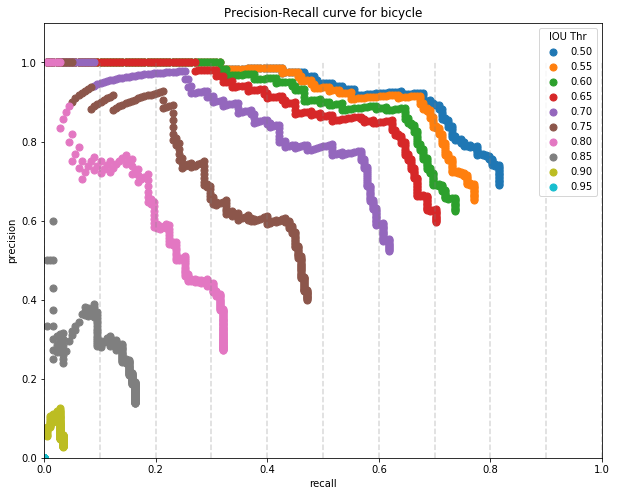

map for bus: 52.31
avg precs:  [0.8038, 0.7987, 0.7965, 0.7859, 0.7008, 0.5986, 0.4572, 0.2349, 0.0478, 0.0073]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.4182 secs


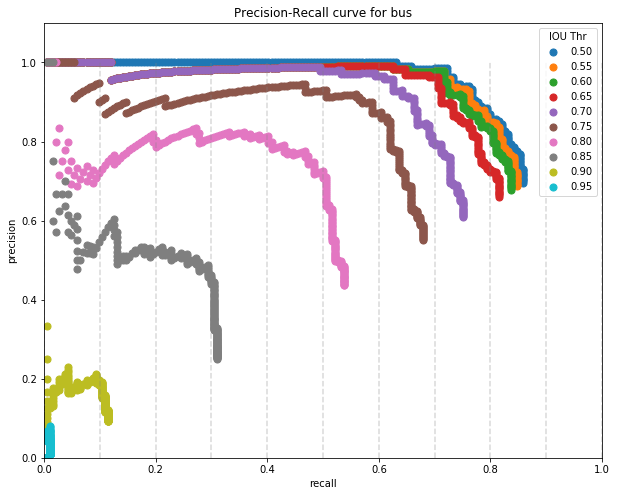

map for car: 39.79
avg precs:  [0.7556, 0.7356, 0.6725, 0.5857, 0.5487, 0.3722, 0.2169, 0.0758, 0.0144, 0.0018]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 2.7543 secs


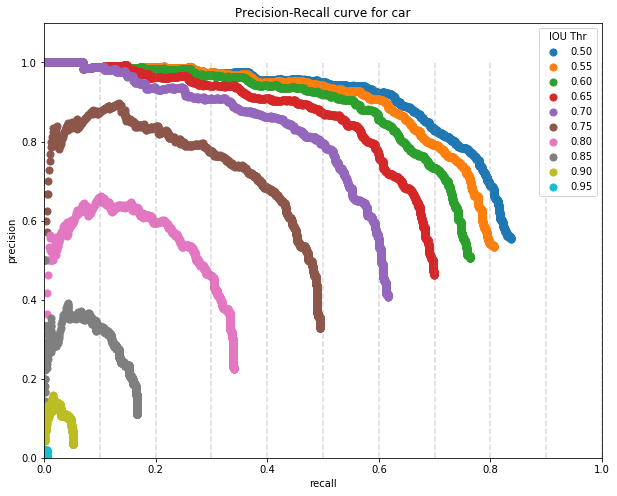

map for motorbike: 40.15
avg precs:  [0.7649, 0.6979, 0.6897, 0.6582, 0.5453, 0.3392, 0.1886, 0.1084, 0.0227, 0.0]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.3718 secs


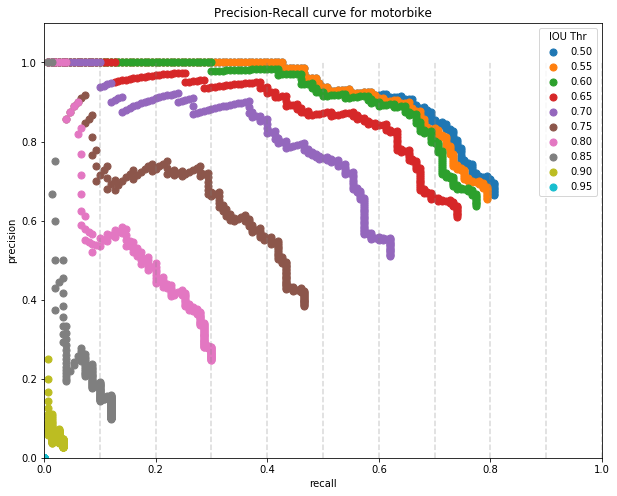

In [20]:
import json
with open('./analysis/gt_boxes.json') as infile:
    gt_boxes_dict = json.load(infile)

with open('./analysis/pred_boxes_v2.json') as infile:
    pred_boxes_dict = json.load(infile)
    
import time
from lib.metrics import *
ap = {key:[] for key in pred_boxes_dict}
for key in pred_boxes_dict:
    gt_boxes = gt_boxes_dict[key]
    pred_boxes = pred_boxes_dict[key]
    start_time = time.time()
    ax = None
    avg_precs = []
    iou_thrs = []
    for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
        data = get_avg_precision_at_iou(gt_boxes, pred_boxes, iou_thr=iou_thr)
        avg_precs.append(data['avg_prec'])
        iou_thrs.append(iou_thr)

        precisions = data['precisions']
        recalls = data['recalls']
        ax = plot_curve(
            precisions, recalls,category=key, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

    # prettify for printing:
    avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
    ap[key] = avg_precs
    iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
    print('map for {}: {:.2f}'.format(key, 100*np.mean(avg_precs)))
    print('avg precs: ', avg_precs)
    print('iou_thrs:  ', iou_thrs)
    plt.legend(loc='upper right', title='IOU Thr', frameon=True)
    for xval in np.linspace(0.0, 1.0, 11):
        plt.vlines(xval, 0.0, 1.0, color='gray', alpha=0.3, linestyles='dashed')
    end_time = time.time()
    print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
    plt.show()

In [21]:
for key in ap:
    print("map for {}: {:.4f}".format(key, sum(ap[key])/len(ap[key])) )
iou_thrs = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i,_ in enumerate(ap['motorbike']):
    print("map for {}: {:.4f}".format(iou_thrs[i], (ap['motorbike'][i] + ap['car'][i] + ap['bus'][i] + ap['bicycle'][i])/4) )

map for bicycle: 0.4085
map for bus: 0.5232
map for car: 0.3979
map for motorbike: 0.4015
map for 0.5: 0.7746
map for 0.55: 0.7326
map for 0.6: 0.7088
map for 0.65: 0.6722
map for 0.7: 0.5875
map for 0.75: 0.4211
map for 0.8: 0.2793
map for 0.85: 0.1254
map for 0.9: 0.0241
map for 0.95: 0.0023


# Current State Of Art

## YOLOv2

map for bicycle: 41.52
avg precs:  [0.7148, 0.7085, 0.6181, 0.6024, 0.5058, 0.452, 0.2788, 0.1694, 0.1017, 0.0006]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.6348 secs


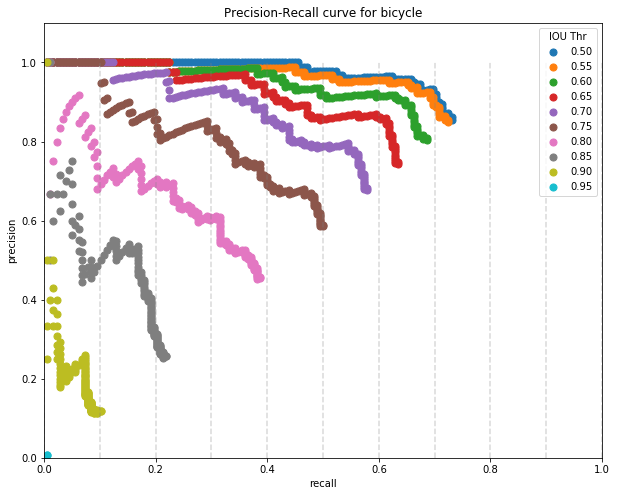

map for bus: 51.57
avg precs:  [0.7188, 0.7188, 0.7094, 0.7094, 0.696, 0.6163, 0.5062, 0.3553, 0.1073, 0.0191]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.3406 secs


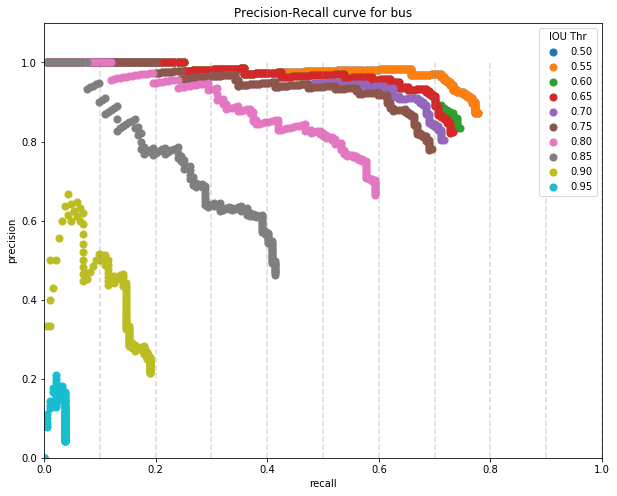

map for car: 35.26
avg precs:  [0.6533, 0.5881, 0.5771, 0.5394, 0.4623, 0.3429, 0.2172, 0.098, 0.0455, 0.0018]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 2.3451 secs


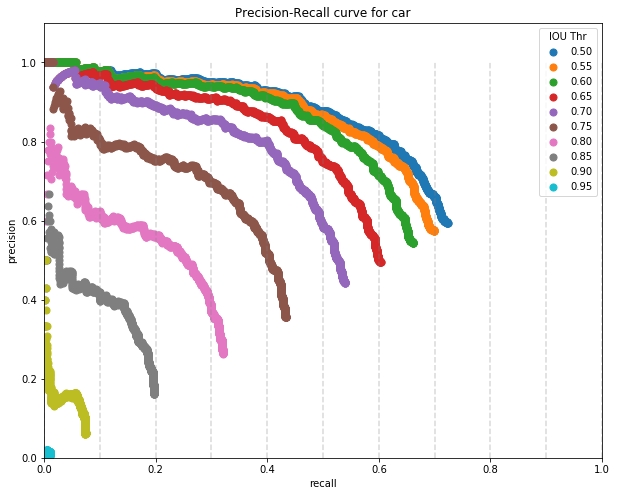

map for motorbike: 35.94
avg precs:  [0.6242, 0.6082, 0.6035, 0.5192, 0.4776, 0.3803, 0.2422, 0.1086, 0.0303, 0.0]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.2995 secs


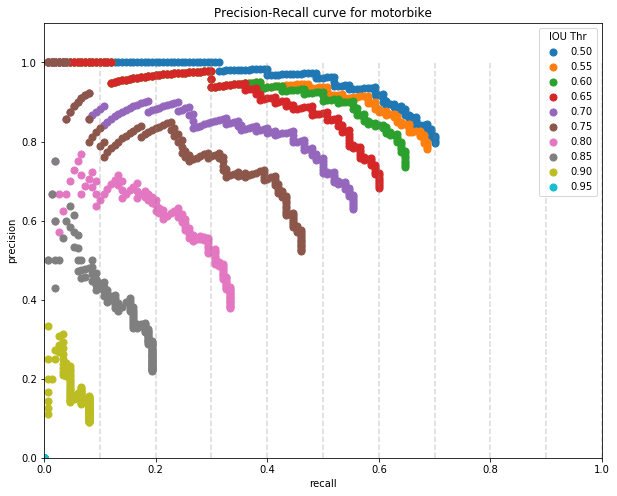

In [3]:
from lib.helpers import draw_box_label
import cv2
from matplotlib import pyplot as plt
voc_sampled = False
ua_sampled = False
import json
with open('./analysis/gt_boxes_yolo.json') as infile:
    gt_boxes_dict = json.load(infile)

with open('./analysis/pred_boxes_yolo.json') as infile:
    pred_boxes_dict = json.load(infile)
    
import time
from lib.metrics import *
ap = {key:[] for key in pred_boxes_dict}
for key in pred_boxes_dict:
    gt_boxes = gt_boxes_dict[key]
    pred_boxes = pred_boxes_dict[key]
    start_time = time.time()
    ax = None
    avg_precs = []
    iou_thrs = []
    for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
        data = get_avg_precision_at_iou(gt_boxes, pred_boxes, iou_thr=iou_thr)
        avg_precs.append(data['avg_prec'])
        iou_thrs.append(iou_thr)

        precisions = data['precisions']
        recalls = data['recalls']
        ax = plot_curve(
            precisions, recalls,category=key, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

    # prettify for printing:
    avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
    ap[key] = avg_precs
    iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
    print('map for {}: {:.2f}'.format(key, 100*np.mean(avg_precs)))
    print('avg precs: ', avg_precs)
    print('iou_thrs:  ', iou_thrs)
    plt.legend(loc='upper right', title='IOU Thr', frameon=True)
    for xval in np.linspace(0.0, 1.0, 11):
        plt.vlines(xval, 0.0, 1.0, color='gray', alpha=0.3, linestyles='dashed')
    end_time = time.time()
    print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
    plt.show()

In [4]:
for key in ap:
    print("map for {}: {:.4f}".format(key, sum(ap[key])/len(ap[key])) )
iou_thrs = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i,_ in enumerate(ap['motorbike']):
    print("map for {}: {:.4f}".format(iou_thrs[i], (ap['motorbike'][i] + ap['car'][i] + ap['bus'][i] + ap['bicycle'][i])/4) )

map for bicycle: 0.4152
map for bus: 0.5157
map for car: 0.3526
map for motorbike: 0.3594
map for 0.5: 0.6778
map for 0.55: 0.6559
map for 0.6: 0.6270
map for 0.65: 0.5926
map for 0.7: 0.5354
map for 0.75: 0.4479
map for 0.8: 0.3111
map for 0.85: 0.1828
map for 0.9: 0.0712
map for 0.95: 0.0054


## SSD

map for bicycle: 31.82
avg precs:  [0.4446, 0.4419, 0.4314, 0.4278, 0.3504, 0.347, 0.3046, 0.2338, 0.1455, 0.0545]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.2830 secs


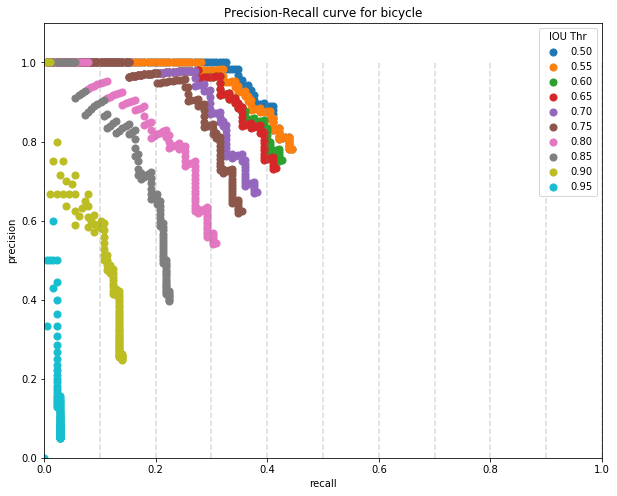

map for bus: 46.28
avg precs:  [0.5426, 0.5426, 0.5417, 0.5417, 0.5417, 0.5399, 0.5338, 0.4406, 0.33, 0.0739]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.2495 secs


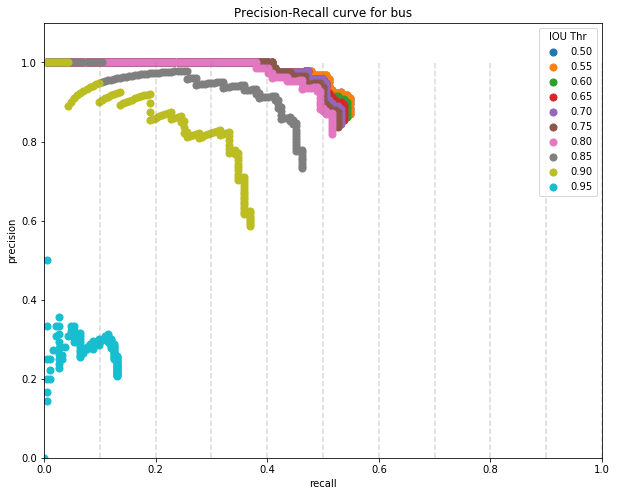

map for car: 25.84
avg precs:  [0.4546, 0.4418, 0.377, 0.3589, 0.2838, 0.2452, 0.1823, 0.1324, 0.0984, 0.0101]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 2.1689 secs


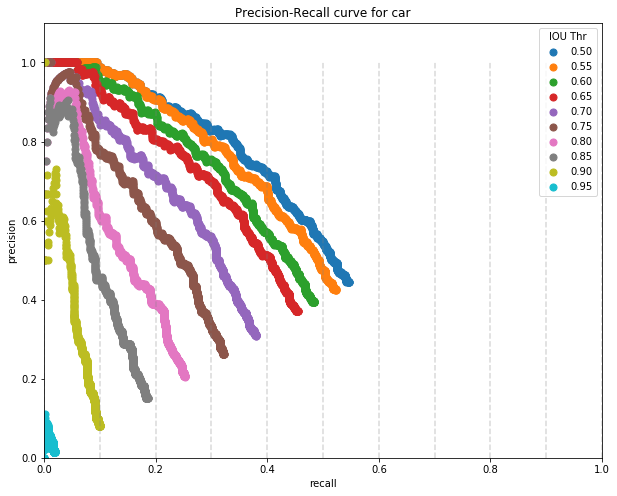

map for motorbike: 32.81
avg precs:  [0.4501, 0.4472, 0.4472, 0.4361, 0.4348, 0.3499, 0.3433, 0.245, 0.1014, 0.026]
iou_thrs:   [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

Plotting and calculating mAP takes 0.2124 secs


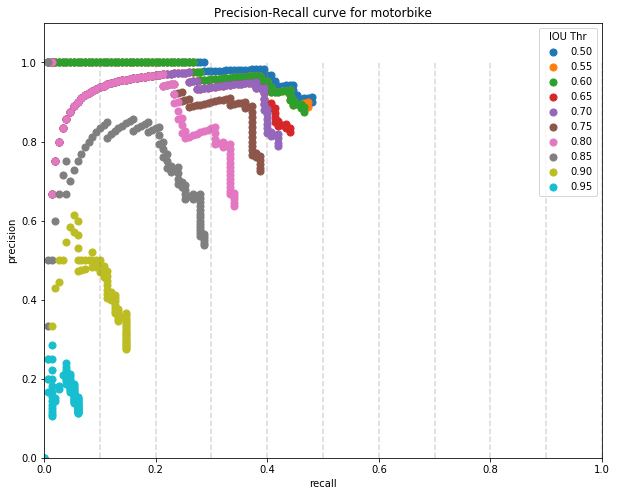

In [3]:
from lib.helpers import draw_box_label
import cv2
from matplotlib import pyplot as plt
voc_sampled = False
ua_sampled = False
import json
with open('./analysis/gt_boxes_yolo.json') as infile:
    gt_boxes_dict = json.load(infile)

with open('./pred_boxes_ssd.json') as infile:
    pred_boxes_dict = json.load(infile)
    
import time
from lib.metrics import *
ap = {key:[] for key in pred_boxes_dict}
for key in pred_boxes_dict:
    gt_boxes = gt_boxes_dict[key]
    pred_boxes = pred_boxes_dict[key]
    start_time = time.time()
    ax = None
    avg_precs = []
    iou_thrs = []
    for idx, iou_thr in enumerate(np.linspace(0.5, 0.95, 10)):
        data = get_avg_precision_at_iou(gt_boxes, pred_boxes, iou_thr=iou_thr)
        avg_precs.append(data['avg_prec'])
        iou_thrs.append(iou_thr)

        precisions = data['precisions']
        recalls = data['recalls']
        ax = plot_curve(
            precisions, recalls,category=key, label='{:.2f}'.format(iou_thr), color=COLORS[idx*2], ax=ax)

    # prettify for printing:
    avg_precs = [float('{:.4f}'.format(ap)) for ap in avg_precs]
    ap[key] = avg_precs
    iou_thrs = [float('{:.4f}'.format(thr)) for thr in iou_thrs]
    print('map for {}: {:.2f}'.format(key, 100*np.mean(avg_precs)))
    print('avg precs: ', avg_precs)
    print('iou_thrs:  ', iou_thrs)
    plt.legend(loc='upper right', title='IOU Thr', frameon=True)
    for xval in np.linspace(0.0, 1.0, 11):
        plt.vlines(xval, 0.0, 1.0, color='gray', alpha=0.3, linestyles='dashed')
    end_time = time.time()
    print('\nPlotting and calculating mAP takes {:.4f} secs'.format(end_time - start_time))
    plt.show()

In [4]:
for key in ap:
    print("map for {}: {:.4f}".format(key, sum(ap[key])/len(ap[key])) )
iou_thrs = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
for i,_ in enumerate(ap['motorbike']):
    print("map for {}: {:.4f}".format(iou_thrs[i], (ap['motorbike'][i] + ap['car'][i] + ap['bus'][i] + ap['bicycle'][i])/4) )

map for bicycle: 0.3182
map for bus: 0.4629
map for car: 0.2585
map for motorbike: 0.3281
map for 0.5: 0.4730
map for 0.55: 0.4684
map for 0.6: 0.4493
map for 0.65: 0.4411
map for 0.7: 0.4027
map for 0.75: 0.3705
map for 0.8: 0.3410
map for 0.85: 0.2630
map for 0.9: 0.1688
map for 0.95: 0.0411
